# Lab-4 Answers

Answer questions in the designated cells

### Quick review of different scalers  

Below simulation and graphs are provided to demonstrate difference between different scalers

- Robust scaler - provides better encoding for distributions with outliers
- Standard scaler - provides scaling for distributions close to normal
- Min-Max scaler - general scaler but with weak point in regard to outliers

You will need to install "seaborn" library in your virtual environment

In [1]:
# Uncomment below line if you need to install seaborn
#!pip install seaborn

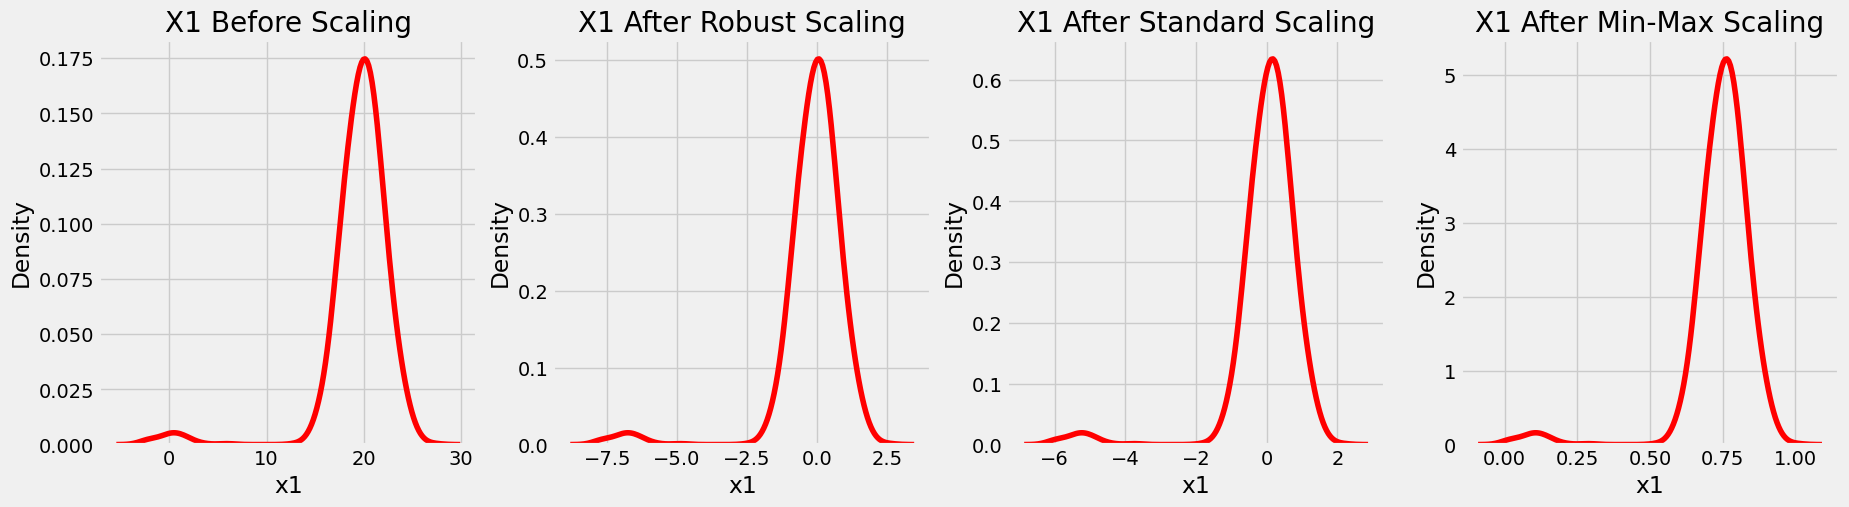

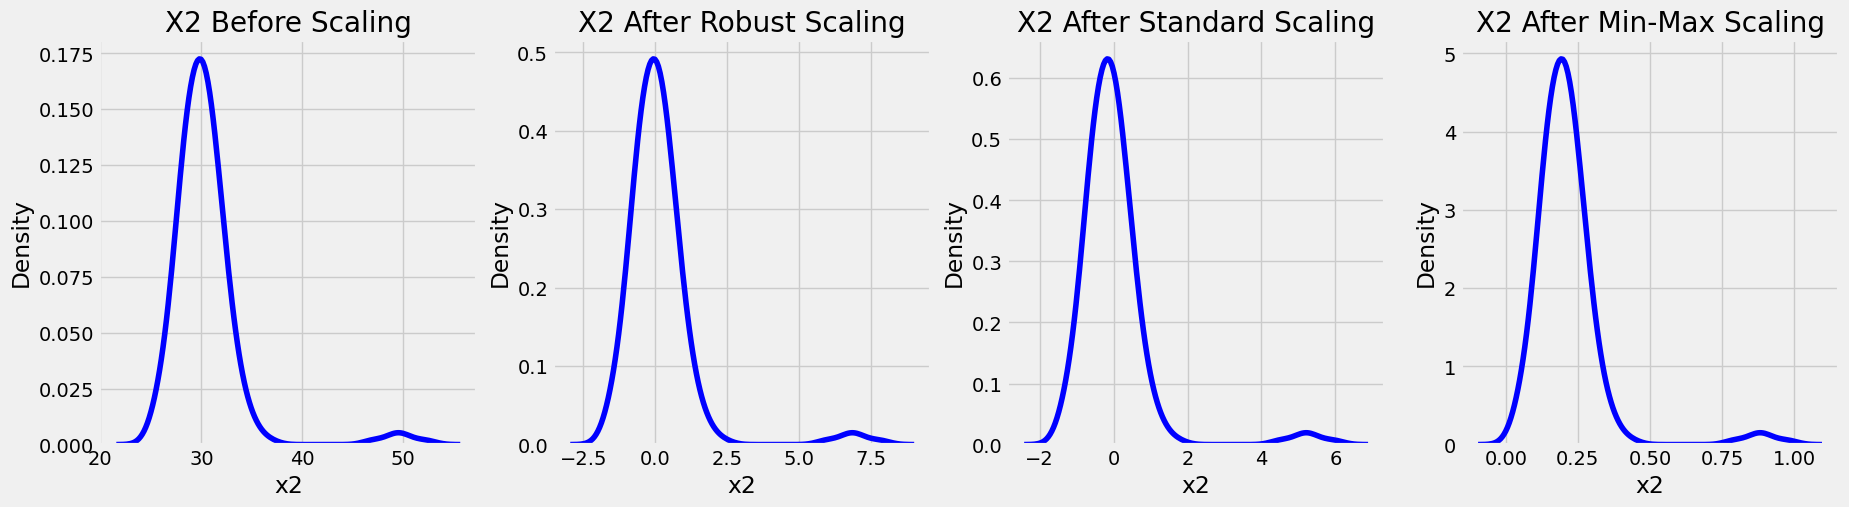

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('fivethirtyeight')

# data
x = pd.DataFrame({
	# Distribution with lower outliers
	'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
	# Distribution with higher outliers
	'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X1 Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')

ax2.set_title('X1 After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='r')

ax3.set_title('X1 After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='r')

ax4.set_title('X1 After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='r')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X2 Before Scaling')
sns.kdeplot(x['x2'], ax = ax1, color ='b')

ax2.set_title('X2 After Robust Scaling')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='b')

ax3.set_title('X2 After Standard Scaling')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='b')
ax4.set_title('X2 After Min-Max Scaling')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='b')
plt.show()

## Preparation

Use dataset provided in the eLearning

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [5]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('./data/Car_Prices_Poland_train.csv')
X_test  = pd.read_csv('./data/Car_Prices_Poland_test.csv')

In [6]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (88445, 10)
Test shape: (29482, 10)


In [7]:
X_train.isna().sum()

mark                   0
model                  0
generation_name    22551
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [8]:
X_train.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500


In [9]:
X_train.describe()

,year,mileage,vol_engine,price
count,88445.000000,8.844500e+04,88445.000000,8.844500e+04
mean,2012.933428,1.408320e+05,1812.341907,7.034750e+04
std,5.684016,9.251080e+04,646.731501,8.527590e+04
min,1964.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.463000e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.390000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [10]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,mark,23,object,3,13,"{'audi': 9042, 'opel': 8898, 'bmw': 8306, 'vol..."
1,model,328,object,1,16,"{'astra': 2479, 'seria-3': 2228, 'a4': 2181, '..."
2,generation_name,364,object,3,30,"{'gen-8p-2003-2012': 1179, 'gen-j-2009-2015': ..."
3,year,51,int64,4,4,"{2021: 7963, 2017: 6672, 2018: 6482, 2016: 529..."
4,mileage,27980,int64,1,7,"{1: 2809, 5: 2416, 10: 1089, 180000: 541, 2200..."
5,vol_engine,465,int64,1,4,"{1598: 7636, 1968: 6101, 1995: 4868, 1997: 400..."
6,fuel,6,object,3,8,"{'Gasoline': 46298, 'Diesel': 36212, 'LPG': 31..."
7,city,3951,object,2,24,"{'Warszawa': 5980, 'Łódź': 2498, 'Kraków': 225..."
8,province,23,object,1,24,"{'Mazowieckie': 16685, 'Śląskie': 12517, 'Wiel..."
9,price,8025,int64,3,7,"{19900: 1009, 39900: 858, 29900: 853, 18900: 8..."


Explore valid values and counts for the variable `mark` 

In [11]:
desc_df.iloc[0]["Level_Values"]

{'audi': 9042,
 'opel': 8898,
 'bmw': 8306,
 'volkswagen': 8072,
 'ford': 7216,
 'mercedes-benz': 5325,
 'renault': 5202,
 'skoda': 4412,
 'toyota': 3878,
 'peugeot': 3848,
 'volvo': 3299,
 'hyundai': 3042,
 'kia': 2828,
 'nissan': 2332,
 'mazda': 2157,
 'fiat': 2150,
 'seat': 2132,
 'citroen': 2031,
 'honda': 1620,
 'mitsubishi': 851,
 'mini': 810,
 'alfa-romeo': 535,
 'chevrolet': 459}

# Question 1 - 1 point

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

## Solution

In [12]:
#Solution
values_to_fill = {}
for col in X_train.drop(columns=['price']).columns:
    if pd.api.types.is_numeric_dtype(X_train[col].dtype):
        values_to_fill[col] = 0
    else:
        values_to_fill[col] = "Missing"
        

X_train.fillna(value=values_to_fill,inplace=True)
X_test.fillna(value=values_to_fill, inplace=True)

## Question 2 - 3 points

For the categorical variables listed below:  
- Use LabelEncoder to encode if number of levels is more than 24 (including)
- Use one-hot-encoding to encode if number of levels is less than or equal to 23. You can use Pandas or `sklearn` approach
- make sure encoder is created from X_train only
- X_test will be encoded from the corresponding encoder above
- Give new columns names "Original-name"_le or "Original-name"_cat_name. Where "cat_name" is valid value present in categorical feature. For example, if column "A" contains values "a, b,c" new column names will be "A_a", "A_b" and "A_c"

One hot encoder, good starting point: https://www.guidodiepen.nl/2021/02/keeping-column-names-when-using-sklearn-onehotencoder-on-pandas-dataframe/

**Don't copy the code, only use the approach!!!**

Relevant for both Encoders.
=======================
You will need to handle situation when certain value of categorical variable doesn't appear in Training set but present in Testing set. Simple way to handle it, is to concatenate the sets. More complex (correct way for production scenario) way see discussion here. You can choose either way and can re-use code below.
https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
Add "Unknown" label, the discussion with 31 votes:
```
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
```        

Don't use target encoding. Target encoding doesn't work well with Linear models.

In [13]:
len_data = len(X_train)
for col in X_train.drop(columns=['price']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  mark  has  23  values
Column  model  has  328  values
Column  generation_name  has  365  values
Column  fuel  has  6  values
Column  city  has  3951  values
Column  province  has  23  values


## Solution

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from copy import deepcopy

'''Save original columns that need to be droped or not used
   Save One-hot and Label encoders for future use
'''
#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in X_train.drop(columns=['price']).columns:
  if X_train[col].dtype == 'object':
    if X_train[col].nunique() < 24:
        print("One-hot encoding of ", col)
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        enc.fit(X_train[[col]])
        result = enc.transform(X_train[[col]])
        ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
        cat_enc_columns = cat_enc_columns + ohe_columns 
        result_train = pd.DataFrame(result, columns=ohe_columns)
        X_train = pd.concat([X_train, result_train], axis=1)
        '''Encode Testing'''
        result = enc.transform(X_test[[col]])
        result_test = pd.DataFrame(result, columns=ohe_columns)
        X_test = pd.concat([X_test, result_test], axis=1)
        cat_encoders[col] = [deepcopy(enc),"ohe"] 
    else:
        print("Label Encode scaling of ", col)
        enc = LabelEncoder()
        enc.fit(list(X_train[col])+list(X_test[col]))
        new_col_name = col+"_le"
        X_train[new_col_name] = enc.transform(X_train[[col]])
        X_test[new_col_name] = enc.transform(X_test[[col]])
        cat_encoders[col] = [deepcopy(enc),"le"]
        cat_enc_columns.append(new_col_name)

        
    cols_to_drop.append(col)

One-hot encoding of  mark
Label Encode scaling of  model
Label Encode scaling of  generation_name
One-hot encoding of  fuel
Label Encode scaling of  city
One-hot encoding of  province


In [15]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("New encoded columns:", cat_enc_columns)

Train shape: (88445, 65)
Test shape: (29482, 65)
New encoded columns: ['mark_alfa-romeo', 'mark_audi', 'mark_bmw', 'mark_chevrolet', 'mark_citroen', 'mark_fiat', 'mark_ford', 'mark_honda', 'mark_hyundai', 'mark_kia', 'mark_mazda', 'mark_mercedes-benz', 'mark_mini', 'mark_mitsubishi', 'mark_nissan', 'mark_opel', 'mark_peugeot', 'mark_renault', 'mark_seat', 'mark_skoda', 'mark_toyota', 'mark_volkswagen', 'mark_volvo', 'model_le', 'generation_name_le', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_Gasoline', 'fuel_Hybrid', 'fuel_LPG', 'city_le', 'province_(', 'province_Berlin', 'province_Dolnośląskie', 'province_Kujawsko-pomorskie', 'province_Lubelskie', 'province_Lubuskie', 'province_Mazowieckie', 'province_Małopolskie', 'province_Moravian-Silesian Region', 'province_Niedersachsen', 'province_Nordrhein-Westfalen', 'province_Opolskie', 'province_Podkarpackie', 'province_Podlaskie', 'province_Pomorskie', 'province_Trenczyn', 'province_Warmińsko-mazurskie', 'province_Wiedeń', 'province_

In [16]:
X_train.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,mark_kia,mark_mazda,mark_mercedes-benz,mark_mini,mark_mitsubishi,mark_nissan,mark_opel,mark_peugeot,mark_renault,mark_seat,mark_skoda,mark_toyota,mark_volkswagen,mark_volvo,model_le,generation_name_le,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,city_le,province_(,province_Berlin,province_Dolnośląskie,province_Kujawsko-pomorskie,province_Lubelskie,province_Lubuskie,province_Mazowieckie,province_Małopolskie,province_Moravian-Silesian Region,province_Niedersachsen,province_Nordrhein-Westfalen,province_Opolskie,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159,11,0.0,0.0,0.0,1.0,0.0,0.0,608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,123,164,0.0,0.0,0.0,1.0,0.0,0.0,367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159,11,0.0,1.0,0.0,0.0,0.0,0.0,3010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,31,0.0,1.0,0.0,0.0,0.0,0.0,121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67,193,0.0,1.0,0.0,0.0,0.0,0.0,737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 3 - 1 point

Use **Standard** scaler to encode numerical variables. Do not to scale new columns you have created as part of categorical features encoding


## Solution

In [17]:
#Columns to scale
cols_numerical_sc = []
cols_numerical_orig = []
for col in X_train.drop(columns=['price']+cat_enc_columns+cols_to_drop):
    if pd.api.types.is_numeric_dtype(X_train[col].dtype):
        print('Column to process:', col)
        cols_numerical_orig.append(col)

Column to process: year
Column to process: mileage
Column to process: vol_engine


In [18]:
from sklearn.preprocessing import StandardScaler
num_scalers = {}
'''Scale only original numerical columns'''
for col in X_train[cols_numerical_orig]:
  if pd.api.types.is_numeric_dtype(X_train[col].dtype):
    print("StandardScaler scale of ", col)
    scaler = StandardScaler()
    scaler.fit(X_train[[col]])
    X_train[col+"_sc"] = scaler.transform(X_train[[col]])
    X_test[col+"_sc"] = scaler.transform(X_test[[col]])
    
    num_scalers[col] = [deepcopy(scaler),"StandardScaler"]
    cols_numerical_sc.append(col+"_sc")
    cols_to_drop.append(col)

StandardScaler scale of  year
StandardScaler scale of  mileage
StandardScaler scale of  vol_engine


In [19]:
X_train.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,mark_kia,mark_mazda,mark_mercedes-benz,mark_mini,mark_mitsubishi,mark_nissan,mark_opel,mark_peugeot,mark_renault,mark_seat,mark_skoda,mark_toyota,mark_volkswagen,mark_volvo,model_le,generation_name_le,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,city_le,province_(,province_Berlin,province_Dolnośląskie,province_Kujawsko-pomorskie,province_Lubelskie,province_Lubuskie,province_Mazowieckie,province_Małopolskie,province_Moravian-Silesian Region,province_Niedersachsen,province_Nordrhein-Westfalen,province_Opolskie,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie,year_sc,mileage_sc,vol_engine_sc
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159,11,0.0,0.0,0.0,1.0,0.0,0.0,608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.692019,-0.375169,-0.025269
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,123,164,0.0,0.0,0.0,1.0,0.0,0.0,367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.516087,0.715250,-0.946831
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159,11,0.0,1.0,0.0,0.0,0.0,0.0,3010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.011712,0.585535,0.222131
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,31,0.0,1.0,0.0,0.0,0.0,0.0,121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.164221,1.504352,0.240686
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67,193,0.0,1.0,0.0,0.0,0.0,0.0,737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187645,-0.201405,-0.390183


In [20]:
print("Original numerical columns:",cols_numerical_orig)
print("Scaled numerical columns:",cols_numerical_sc)

Original numerical columns: ['year', 'mileage', 'vol_engine']
Scaled numerical columns: ['year_sc', 'mileage_sc', 'vol_engine_sc']


## Question 4 - 2 points

-- Add `price` reference on 2/16.    
Train `LinearRegression` on the Train dataset to predict `price`. 

Score Test dataset. Report performance metrics for both, Train and Test datasets.
Report following metrics:
- R-square
- Mean absolute error

## Solution

In [21]:
print("Will not use following columns that are already encoded:", "\n",cols_to_drop)
print("\n +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("Will be using following features:",cols_numerical_sc, cat_enc_columns)
print("\n +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Will not use following columns that are already encoded: 
 ['mark', 'model', 'generation_name', 'fuel', 'city', 'province', 'year', 'mileage', 'vol_engine']

 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Will be using following features: ['year_sc', 'mileage_sc', 'vol_engine_sc'] ['mark_alfa-romeo', 'mark_audi', 'mark_bmw', 'mark_chevrolet', 'mark_citroen', 'mark_fiat', 'mark_ford', 'mark_honda', 'mark_hyundai', 'mark_kia', 'mark_mazda', 'mark_mercedes-benz', 'mark_mini', 'mark_mitsubishi', 'mark_nissan', 'mark_opel', 'mark_peugeot', 'mark_renault', 'mark_seat', 'mark_skoda', 'mark_toyota', 'mark_volkswagen', 'mark_volvo', 'model_le', 'generation_name_le', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_Gasoline', 'fuel_Hybrid', 'fuel_LPG', 'city_le', 'province_(', 'province_Berlin', 'province_Dolnośląskie', 'province_Kujawsko-pomorskie', 'province_Lubelskie', 'province_Lubuskie', 'province_Mazowieckie', 'province_Małopolskie', 'province_Moravian-Silesian

In [22]:
from sklearn.linear_model import LinearRegression


X_tr = X_train[cols_numerical_sc+cat_enc_columns]
Y_tr = X_train.price

X_tst = X_test[cols_numerical_sc+cat_enc_columns]
Y_tst = X_test.price


lreg = LinearRegression()
lreg.fit(X_tr, Y_tr)
print(lreg.score(X_tr, Y_tr))
print(lreg.score(X_tst, Y_tst))

0.6376826004399709
0.658074289757326


In [23]:
# Calculate R^2 score on Test dataset
from sklearn.metrics import r2_score
y_true = list(Y_tst)
y_pred = list(lreg.predict(X_tst))
r2_score(y_true, y_pred)

0.658074289757326

## Question 5 - 2 points

Train RidgeRegression on the Train dataset. Use `alpha=.2`. Score Test dataset. Report performance metrics for for both, Train and Test datasets. Report following metrics:
- R-square
- Mean absolute error


## Solution

In [24]:
from sklearn.linear_model import Ridge


X_tr = X_train[cols_numerical_sc+cat_enc_columns]
Y_tr = X_train.price

X_tst = X_test[cols_numerical_sc+cat_enc_columns]
Y_tst = X_test.price


reg = Ridge(alpha=.2)
reg.fit(X_tr, Y_tr)
print("R^2 Train:", reg.score(X_tr, Y_tr))
print("R^2 Test:", reg.score(X_tst, Y_tst))

R^2 Train: 0.6376820074167231
R^2 Test: 0.6580732904325142


In [25]:
from sklearn.metrics import mean_absolute_error
y_true = list(Y_tst)
y_pred = list(reg.predict(X_tst))
print('MAE:', mean_absolute_error(y_true,y_pred))

MAE: 29608.58791142827


## Question 6 - 2 points

Train LassoRegression on the Train dataset. Use `alpha=.2`. Score Test dataset. Report performance metrics for both, Train and Test datasets. Report following metrics:
- R-square
- Mean absolute error


## Solution

In [26]:
from sklearn.linear_model import Lasso


X_tr = X_train[cols_numerical_sc+cat_enc_columns]
Y_tr = X_train.price

X_tst = X_test[cols_numerical_sc+cat_enc_columns]
Y_tst = X_test.price


reg = Lasso(alpha=.2)
reg.fit(X_tr, Y_tr)
print("R^2 Train:", reg.score(X_tr, Y_tr))
print("R^2 Test:", reg.score(X_tst, Y_tst))

y_true = list(Y_tst)
y_pred = list(reg.predict(X_tst))
print('MAE:', mean_absolute_error(y_true,y_pred))

R^2 Train: 0.6376801965583974
R^2 Test: 0.6580648883637606
MAE: 29608.9842235283


## Question 7 - 2 points

Calculate and print scaled and unscaled coeficients and intercent for the Lasso regression model. 

Clarification:
- Unscaled coeficients can be applied to non-standardized (un-scaled) data to produce target.
- If you have scaled your dataset and trained linear model, the coeficients are calculated for scaled (standardized) data, and can be used to produce relative feature importance.

## Solution

In [27]:
print("Number of coeficients:", len(reg.coef_))
print("Number of variables:", X_tst.shape[1])
print("Intercept of the model is :", reg.intercept_)

Number of coeficients: 58
Number of variables: 58
Intercept of the model is : 55530.2347671348


In [28]:
X_tst.columns

Index(['year_sc', 'mileage_sc', 'vol_engine_sc', 'mark_alfa-romeo',
       'mark_audi', 'mark_bmw', 'mark_chevrolet', 'mark_citroen', 'mark_fiat',
       'mark_ford', 'mark_honda', 'mark_hyundai', 'mark_kia', 'mark_mazda',
       'mark_mercedes-benz', 'mark_mini', 'mark_mitsubishi', 'mark_nissan',
       'mark_opel', 'mark_peugeot', 'mark_renault', 'mark_seat', 'mark_skoda',
       'mark_toyota', 'mark_volkswagen', 'mark_volvo', 'model_le',
       'generation_name_le', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric',
       'fuel_Gasoline', 'fuel_Hybrid', 'fuel_LPG', 'city_le', 'province_(',
       'province_Berlin', 'province_Dolnośląskie',
       'province_Kujawsko-pomorskie', 'province_Lubelskie',
       'province_Lubuskie', 'province_Mazowieckie', 'province_Małopolskie',
       'province_Moravian-Silesian Region', 'province_Niedersachsen',
       'province_Nordrhein-Westfalen', 'province_Opolskie',
       'province_Podkarpackie', 'province_Podlaskie', 'province_Pomorskie',
       'provi

### All coeficients as calculated on input data ordered per magnitude

In [29]:
coef_dict = dict(zip(X_tst.columns,reg.coef_))
sorted_tuples = sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)
for tup in sorted_tuples:
    print(tup[0]," column coeficient is ", round(tup[1],2))

fuel_Electric  column coeficient is  115920.07
province_Trenczyn  column coeficient is  -76933.77
province_Nordrhein-Westfalen  column coeficient is  -64029.04
mark_mercedes-benz  column coeficient is  56094.95
mark_audi  column coeficient is  38838.61
year_sc  column coeficient is  34593.78
fuel_Hybrid  column coeficient is  32211.81
vol_engine_sc  column coeficient is  28462.21
mark_bmw  column coeficient is  28080.67
mileage_sc  column coeficient is  -26327.1
mark_chevrolet  column coeficient is  -23009.5
mark_volvo  column coeficient is  21159.73
mark_hyundai  column coeficient is  -19074.3
mark_kia  column coeficient is  -18557.69
mark_fiat  column coeficient is  -18062.31
province_Wiedeń  column coeficient is  -14480.39
mark_mitsubishi  column coeficient is  -14418.01
mark_toyota  column coeficient is  -13665.58
fuel_CNG  column coeficient is  -12555.64
mark_alfa-romeo  column coeficient is  11799.47
mark_honda  column coeficient is  9820.13
mark_volkswagen  column coeficient is 

In [30]:
cols_numerical_sc

['year_sc', 'mileage_sc', 'vol_engine_sc']

In [31]:
for item in sorted_tuples:
    if item[0] in cols_numerical_sc:
        col = item[0][:-3]
        coef = item[1]
        print(f"Re-scaled coeficient for column \"{col}\"")
        scaler = num_scalers[col][0]
        print("Old Coeficient:",coef," New Coeficient:",np.true_divide(coef,  scaler.scale_))
        print("\n")

Re-scaled coeficient for column "year"
Old Coeficient: 34593.78055713363  New Coeficient: [6086.18565097]


Re-scaled coeficient for column "vol_engine"
Old Coeficient: 28462.207618915472  New Coeficient: [44.00955959]


Re-scaled coeficient for column "mileage"
Old Coeficient: -26327.09983068773  New Coeficient: [-0.28458568]




In [32]:
X_train["mileage"].mean()

140832.0195488722

### Calculate Intercept for use with unscaled Data

From ChatGPT conversation:
    
**Question**: How to get linear model intercept when input variables where centered and scaled?

**ChatGPT Answer**:
If the input variables in a linear model were centered and scaled, the intercept can be obtained by reversing the scaling and centering operation.

Suppose you have a linear model with p input variables, where each variable has been centered and scaled, and a response variable Y. Let xi be the i-th input variable, βi be the corresponding coefficient in the model, and let x̄i and si be the mean and standard deviation of the i-th input variable.

To obtain the intercept in the original scale, you can use the following formula:

intercept = Ȳ - β1 * x̄1 / s1 - β2 * x̄2 / s2 - ... - βp * x̄p / sp

where Ȳ is the mean of the response variable Y.

In this formula, the first term Ȳ represents the expected value of Y when all the input variables are equal to their mean value. The second term represents the contribution of the first input variable to the intercept, and so on for the remaining input variables. Each term is obtained by multiplying the corresponding coefficient by the ratio of the mean and standard deviation of the corresponding input variable.

This formula effectively undoes the centering and scaling of the input variables, so that the intercept is expressed in the original scale of the data.

It's important to note that this formula assumes that the input variables were centered and scaled using the mean and standard deviation of the original data, and that the same transformation was applied to the validation and test sets. If a different scaling method was used, or if the validation and test sets were transformed differently, the intercept obtained from this formula may not be accurate.





In [33]:
print("Original  Intercept:", reg.intercept_)

new_intercept = reg.intercept_
for item in sorted_tuples:
    if item[0] in cols_numerical_sc:
        col = item[0][:-3]
        coef = item[1]
        scaler = num_scalers[col][0]
        new_intercept = new_intercept - coef*scaler.mean_[0]/scaler.scale_[0]
        
print("Intercept to use with original/un-scaled data:", new_intercept)

Original  Intercept: 55530.2347671348
Intercept to use with original/un-scaled data: -12235237.901690135


#### Validate Calculations

Calculate prediction using three different ways:
1. Model `predict` function
2. Original model intercept plus coeficients on the data with numerical variables scaled
3. Adjusted Model intercept and coeficients on un-scaled (original) numerical variables

In [34]:
# First record in the model expected format (scaled)
test_0 = X_tst.iloc[[0]]
#X_tst = X_test[cols_numerical_sc+cat_enc_columns]

# Model prediction
print("Model prediction:", reg.predict(test_0)[0])

# Manual calculation
pred = reg.intercept_ + np.dot(reg.coef_,test_0.values[0])
print("Manually calculated prediction:", pred)

Model prediction: 84899.1950366825
Manually calculated prediction: 84899.1950366825


#### Calculate prediction using un-scaled coeficients and intercept

In [35]:
# Get dictionary of coeficients
coef_dict = {}
for item in sorted_tuples:
    coef_dict[item[0]] = item[1]
    if item[0] in cols_numerical_sc:
        col = item[0][:-3]
        coef = item[1]
        scaler = num_scalers[col][0]
        coef_dict[col] = np.true_divide(coef,  scaler.scale_)

In [36]:
pred_unscaled = new_intercept
test_all_0 = X_test.iloc[[0]]
for col in cols_numerical_orig+cat_enc_columns:
    pred_unscaled += test_all_0.iloc[0][col]*coef_dict[col]

print("Calculated prediction on un-scaled data:", pred_unscaled)

Calculated prediction on un-scaled data: [84899.19503668]


## Question 8 - 2 points

Review coefficients and intercept of Lasso regression.
What can you tell about the model based on the coefficients and the intercept?
Include following:
- How can you explain to your manager meaning of coefficient?
- Should you use scaled or un-scaled (standard) coeficients? 
- What is the most important variable and how does it impact price? 
- What is the least important variable? How does it impact price prediction?

## Solution

The coefficients in a linear model represent the expected change in the response variable for a one-unit change in the corresponding predictor variable, while holding all other predictor variables constant.

In our case, we will need to consider following scenarios:

1. Variable is on-hot-encoded. It means there is collinearity between variables produced from a single variable using one-hot encoding. It means that coefficient for a particular value of the categorical variable (represented via column/input feature) is contributing to the model prediction via its coefficient. For example, `fuel_Electric`will add `115920.07` to the price, while `fuel_Hybrid` will add `32211.81` 
2. Variable is categorical and encoded via LabelEncoder. The coefficient is very hard to interpret. In general, we should not use LabelEncoder for production models. We have 3 such variables, and they are all at the bottom of the coefficient importance. However, because we did not scale the variable it can still have large impact on the model prediction depending on the input value in the column.
3. Variable is numerical. The unscaled coefficient represents the expected change in the response variable for a one-unit change in the variable, while holding all other predictor variables constant.

In [37]:
coef_dict = dict(zip(X_tst.columns,reg.coef_))
sorted_tuples = sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)
for tup in sorted_tuples:
    print(tup[0]," column coeficient is ", round(tup[1],2))

fuel_Electric  column coeficient is  115920.07
province_Trenczyn  column coeficient is  -76933.77
province_Nordrhein-Westfalen  column coeficient is  -64029.04
mark_mercedes-benz  column coeficient is  56094.95
mark_audi  column coeficient is  38838.61
year_sc  column coeficient is  34593.78
fuel_Hybrid  column coeficient is  32211.81
vol_engine_sc  column coeficient is  28462.21
mark_bmw  column coeficient is  28080.67
mileage_sc  column coeficient is  -26327.1
mark_chevrolet  column coeficient is  -23009.5
mark_volvo  column coeficient is  21159.73
mark_hyundai  column coeficient is  -19074.3
mark_kia  column coeficient is  -18557.69
mark_fiat  column coeficient is  -18062.31
province_Wiedeń  column coeficient is  -14480.39
mark_mitsubishi  column coeficient is  -14418.01
mark_toyota  column coeficient is  -13665.58
fuel_CNG  column coeficient is  -12555.64
mark_alfa-romeo  column coeficient is  11799.47
mark_honda  column coeficient is  9820.13
mark_volkswagen  column coeficient is 